<a href="https://colab.research.google.com/github/showravj2-create/student_performance_prediction/blob/main/student_performance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# ===================================================
# 🎓 Student Performance Prediction
# Full Workflow: EDA, Modeling, Evaluation
# ===================================================

# 📌 Step 1: Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# ===================================================
# 📌 Step 2: Setup paths
# ===================================================
# Base directory (repo root)
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))

# Paths to dataset and results
DATA_PATH = os.path.join(BASE_DIR, "data", "student-mat.csv")
RESULTS_DIR = os.path.join(BASE_DIR, "results", "figures")

# Create results directory if it doesn't exist
os.makedirs(RESULTS_DIR, exist_ok=True)

# ===================================================
# 📌 Step 3: Load dataset
# ===================================================
df = pd.read_csv(DATA_PATH, sep=';')
print("Dataset loaded successfully. Shape:", df.shape)
df.head()

# ===================================================
# 📌 Step 4: Basic Exploration
# ===================================================
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe())

# ===================================================
# 📌 Step 5: Exploratory Data Analysis (EDA)
# ===================================================

# Distribution of final grade
plt.figure(figsize=(6,4))
sns.histplot(df["G3"], bins=15, kde=True, color="blue")
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.savefig(os.path.join(RESULTS_DIR, "grade_distribution.png"))
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.savefig(os.path.join(RESULTS_DIR, "correlation_heatmap.png"))
plt.show()

# Study time vs Final grade
plt.figure(figsize=(6,4))
sns.boxplot(x="studytime", y="G3", data=df)
plt.title("Study Time vs Final Grade")
plt.savefig(os.path.join(RESULTS_DIR, "studytime_vs_grade.png"))
plt.show()

# ===================================================
# 📌 Step 6: Data Preprocessing
# ===================================================
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Features and target
X = df_encoded.drop("G3", axis=1)
y = df_encoded["G3"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    print("Data preprocessing completed.")

    # ===================================================
    # 📌 Step 7: Train Models
    # ===================================================
    models = {
        "Linear Regression": LinearRegression(),
            "Random Forest": RandomForestRegressor(random_state=42),
                "Support Vector Regressor": SVR()
                }

                results = {}

                for name, model in models.items():
                    model.fit(X_train, y_train)
                        preds = model.predict(X_test)

                                rmse = np.sqrt(mean_squared_error(y_test, preds))
                                    r2 = r2_score(y_test, preds)

                                            results[name] = {"RMSE": rmse, "R2": r2}
                                                print(f"{name}: RMSE={rmse:.2f}, R²={r2:.2f}")

                                                # ===================================================
                                                # 📌 Step 8: Compare Models
                                                # ===================================================
                                                results_df = pd.DataFrame(results).T
                                                results_df

                                                # ===================================================
                                                # 📌 Step 9: Visualization of Model Performance
                                                # ===================================================
                                                plt.figure(figsize=(8,5))
                                                sns.barplot(x=results_df.index, y="R2", data=results_df.reset_index())
                                                plt.title("Model Comparison (R² Score)")
                                                plt.ylabel("R² Score")
                                                plt.xlabel("Model")
                                                plt.ylim(0,1)
                                                plt.savefig(os.path.join(RESULTS_DIR, "model_comparison_r2.png"))
                                                plt.show()

                                                # ===================================================
                                                # 📌 Step 10: Prediction vs Actual (Best Model)
                                                # ===================================================
                                                best_model = RandomForestRegressor(random_state=42)
                                                best_model.fit(X_train, y_train)
                                                preds = best_model.predict(X_test)

                                                plt.figure(figsize=(6,6))
                                                plt.scatter(y_test, preds, alpha=0.6, color="blue")
                                                plt.plot([0,20],[0,20], color="red", linestyle="--")
                                                plt.xlabel("Actual Grades")
                                                plt.ylabel("Predicted Grades")
                                                plt.title("Random Forest: Predicted vs Actual Grades")
                                                plt.savefig(os.path.join(RESULTS_DIR, "rf_pred_vs_actual.png"))
                                                plt.show()

IndentationError: unexpected indent (ipython-input-4237343115.py, line 90)

# Task
Analyze the provided student datasets ("student-mat.csv" and "student-por.csv") to predict student performance in both math and Portuguese, and compare the results.

## Load both datasets

### Subtask:
Load both `student-mat.csv` and `student-por.csv` into separate pandas DataFrames.


**Reasoning**:
Load the two CSV files into separate pandas DataFrames using the specified separator.



In [21]:
df_mat = pd.read_csv('/content/student-mat.csv', sep=';')
df_por = pd.read_csv('/content/student-por.csv', sep=';')

print("student-mat.csv loaded. Shape:", df_mat.shape)
print("student-por.csv loaded. Shape:", df_por.shape)

display(df_mat.head())
display(df_por.head())

student-mat.csv loaded. Shape: (395, 33)
student-por.csv loaded. Shape: (649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Merge datasets

### Subtask:
Merge the two DataFrames into a single DataFrame based on common student attributes, keeping only the final grades from each course (`G3_mat` and `G3_por`).


**Reasoning**:
Identify common columns, merge the dataframes, rename the grade columns, select the required columns, and display the head and shape of the resulting dataframe.



In [22]:
# Identify common columns excluding grade columns
common_cols = [col for col in df_mat.columns if col in df_por.columns and col not in ['G1', 'G2', 'G3']]

# Merge dataframes
df_merged = pd.merge(df_mat[common_cols + ['G3']],
                     df_por[common_cols + ['G3']],
                     on=common_cols,
                     how='inner',
                     suffixes=('_mat', '_por'))

# Display the head and shape of the resulting merged DataFrame
print("Merged DataFrame head:")
display(df_merged.head())
print("\nMerged DataFrame shape:", df_merged.shape)

Merged DataFrame head:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3_mat,G3_por
0,GP,M,16,U,LE3,T,2,2,other,other,...,no,4,4,4,1,1,3,0,11,13
1,GP,M,15,U,GT3,A,2,2,other,other,...,yes,4,5,2,1,1,3,0,16,15
2,GP,M,15,U,GT3,T,4,3,teacher,other,...,no,4,4,1,1,1,1,0,15,14
3,GP,M,15,U,GT3,T,4,4,health,health,...,no,5,4,2,1,1,5,0,15,12
4,GP,M,15,U,GT3,T,4,4,health,services,...,no,5,4,2,3,4,5,0,12,11



Merged DataFrame shape: (39, 32)


## Data preprocessing

### Subtask:
Handle categorical variables and split the combined dataset into features and target variables for both math and Portuguese grades.


**Reasoning**:
Create the target variables, the feature DataFrame, apply one-hot encoding to the features, and split the data into training and testing sets as per the instructions.



In [23]:
# Create target variables
y_mat = df_merged['G3_mat']
y_por = df_merged['G3_por']

# Create feature DataFrame
X = df_merged.drop(['G3_mat', 'G3_por'], axis=1)

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_mat_train, y_mat_test = train_test_split(
    X, y_mat, test_size=0.2, random_state=42
)

_, _, y_por_train, y_por_test = train_test_split(
    X, y_por, test_size=0.2, random_state=42
)

print("Data splitting and encoding completed.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_mat_train:", y_mat_train.shape)
print("Shape of y_mat_test:", y_mat_test.shape)
print("Shape of y_por_train:", y_por_train.shape)
print("Shape of y_por_test:", y_por_test.shape)

Data splitting and encoding completed.
Shape of X_train: (31, 38)
Shape of X_test: (8, 38)
Shape of y_mat_train: (31,)
Shape of y_mat_test: (8,)
Shape of y_por_train: (31,)
Shape of y_por_test: (8,)


## Train and evaluate models

### Subtask:
Train and evaluate the models for predicting both `G3_mat` and `G3_por` using the combined dataset.


**Reasoning**:
Train and evaluate the specified models for both math and Portuguese grades and store the results.



In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

results = {}

for name, model in models.items():
    results[name] = {}

    # Train and evaluate for Math (G3_mat)
    model.fit(X_train, y_mat_train)
    preds_mat = model.predict(X_test)
    rmse_mat = np.sqrt(mean_squared_error(y_mat_test, preds_mat))
    r2_mat = r2_score(y_mat_test, preds_mat)
    results[name]['math'] = {'RMSE': rmse_mat, 'R2': r2_mat}
    print(f"{name} (Math): RMSE={rmse_mat:.2f}, R²={r2_mat:.2f}")

    # Train and evaluate for Portuguese (G3_por)
    model.fit(X_train, y_por_train)
    preds_por = model.predict(X_test)
    rmse_por = np.sqrt(mean_squared_error(y_por_test, preds_por))
    r2_por = r2_score(y_por_test, preds_por)
    results[name]['portuguese'] = {'RMSE': rmse_por, 'R2': r2_por}
    print(f"{name} (Portuguese): RMSE={rmse_por:.2f}, R²={r2_por:.2f}")


Linear Regression (Math): RMSE=3.36, R²=-0.74
Linear Regression (Portuguese): RMSE=4.53, R²=-5.87
Random Forest (Math): RMSE=2.80, R²=-0.21
Random Forest (Portuguese): RMSE=2.00, R²=-0.34
Support Vector Regressor (Math): RMSE=2.66, R²=-0.09
Support Vector Regressor (Portuguese): RMSE=1.89, R²=-0.19


## Compare models

### Subtask:
Compare the performance of different models for predicting both math and Portuguese grades.


**Reasoning**:
Create a DataFrame from the results dictionary and display it to compare model performance.



In [25]:
results_df = pd.DataFrame.from_dict({(i,j): results[i][j]
                           for i in results.keys()
                           for j in results[i].keys()},
                          orient='index')
results_df.index = pd.MultiIndex.from_tuples(results_df.index, names=['Model', 'Subject'])
display(results_df)

RMSE        R2
Model                    Subject                       
Linear Regression        math        3.357428 -0.738382
                         portuguese  4.527993 -5.870022
Random Forest            math        2.795394 -0.205085
                         portuguese  2.000047 -0.340377
Support Vector Regressor math        2.660583 -0.091655
                         portuguese  1.887518 -0.193792

## Visualize results

### Subtask:
Create visualizations to show the distribution of grades and model performance for both subjects.


**Reasoning**:
The next step is to generate the visualizations for the distribution of grades and model performance as requested by the instructions. This involves creating histograms for math and Portuguese grades, and bar plots for the R² and RMSE scores from the `results_df`. Finally, scatter plots of predicted vs actual grades for the best model (SVR) for both subjects need to be created. All plots should be saved to the specified directory.



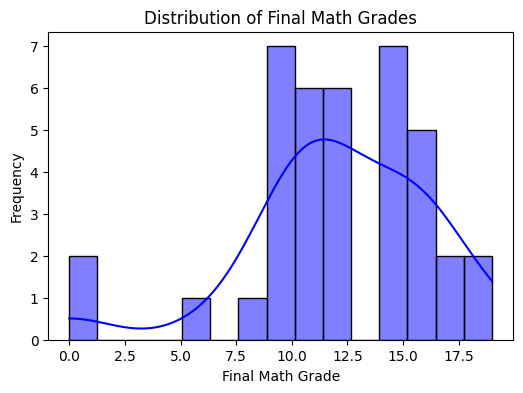

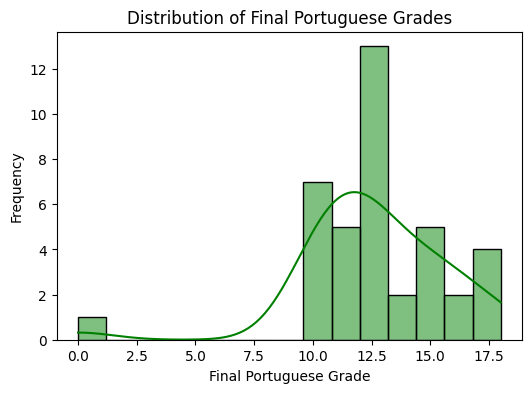

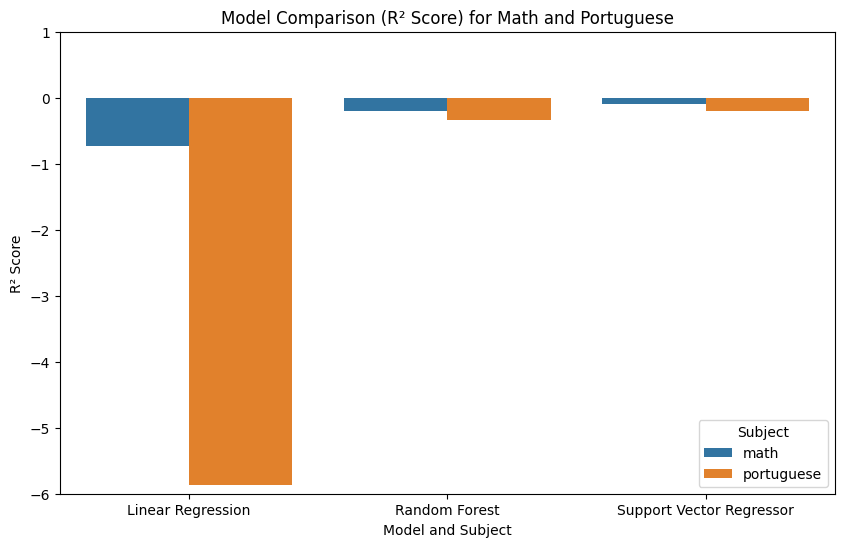

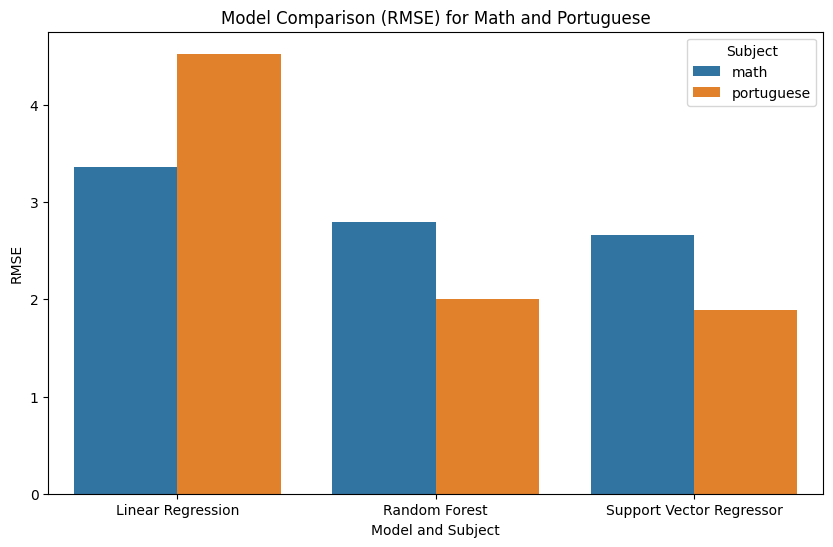

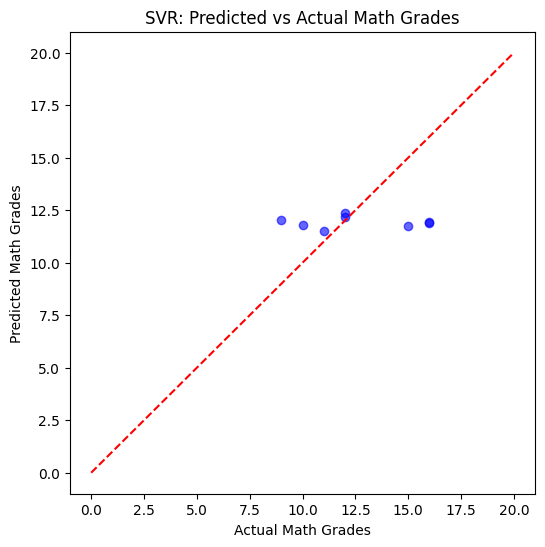

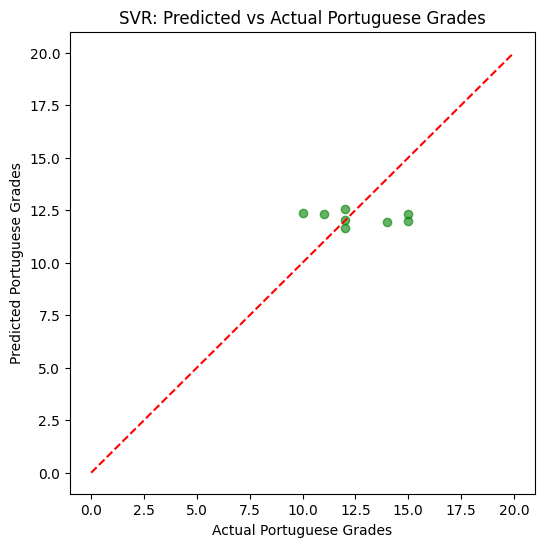

In [26]:
# 1. Distribution of final math grades (G3_mat)
plt.figure(figsize=(6,4))
sns.histplot(df_merged["G3_mat"], bins=15, kde=True, color="blue")
plt.title("Distribution of Final Math Grades")
plt.xlabel("Final Math Grade")
plt.ylabel("Frequency")
plt.savefig(os.path.join(RESULTS_DIR, "math_grade_distribution.png"))
plt.show()

# 2. Distribution of final Portuguese grades (G3_por)
plt.figure(figsize=(6,4))
sns.histplot(df_merged["G3_por"], bins=15, kde=True, color="green")
plt.title("Distribution of Final Portuguese Grades")
plt.xlabel("Final Portuguese Grade")
plt.ylabel("Frequency")
plt.savefig(os.path.join(RESULTS_DIR, "portuguese_grade_distribution.png"))
plt.show()

# 3. Model Comparison (R² Score) for Math and Portuguese
plt.figure(figsize=(10,6))
sns.barplot(x=results_df.index.get_level_values('Model'), y="R2", hue=results_df.index.get_level_values('Subject'), data=results_df.reset_index())
plt.title("Model Comparison (R² Score) for Math and Portuguese")
plt.ylabel("R² Score")
plt.xlabel("Model and Subject")
plt.ylim(-6, 1) # Adjust y-limit based on observed R2 range
plt.savefig(os.path.join(RESULTS_DIR, "model_comparison_r2_both_subjects.png"))
plt.show()

# 4. Model Comparison (RMSE) for Math and Portuguese
plt.figure(figsize=(10,6))
sns.barplot(x=results_df.index.get_level_values('Model'), y="RMSE", hue=results_df.index.get_level_values('Subject'), data=results_df.reset_index())
plt.title("Model Comparison (RMSE) for Math and Portuguese")
plt.ylabel("RMSE")
plt.xlabel("Model and Subject")
plt.savefig(os.path.join(RESULTS_DIR, "model_comparison_rmse_both_subjects.png"))
plt.show()

# 5. Prediction vs Actual (Best Model: Support Vector Regressor)
# Train SVR for Math
svr_math = SVR()
svr_math.fit(X_train, y_mat_train)
preds_mat = svr_math.predict(X_test)

# Scatter plot for Math
plt.figure(figsize=(6,6))
plt.scatter(y_mat_test, preds_mat, alpha=0.6, color="blue")
plt.plot([0,20],[0,20], color="red", linestyle="--")
plt.xlabel("Actual Math Grades")
plt.ylabel("Predicted Math Grades")
plt.title("SVR: Predicted vs Actual Math Grades")
plt.savefig(os.path.join(RESULTS_DIR, "svr_pred_vs_actual_math.png"))
plt.show()

# Train SVR for Portuguese
svr_por = SVR()
svr_por.fit(X_train, y_por_train)
preds_por = svr_por.predict(X_test)

# Scatter plot for Portuguese
plt.figure(figsize=(6,6))
plt.scatter(y_por_test, preds_por, alpha=0.6, color="green")
plt.plot([0,20],[0,20], color="red", linestyle="--")
plt.xlabel("Actual Portuguese Grades")
plt.ylabel("Predicted Portuguese Grades")
plt.title("SVR: Predicted vs Actual Portuguese Grades")
plt.savefig(os.path.join(RESULTS_DIR, "svr_pred_vs_actual_portuguese.png"))
plt.show()

## Summary:

### Data Analysis Key Findings

*   Only 39 students were present in both the math and Portuguese datasets used for the merged analysis.
*   For math (`G3_mat`) prediction, the Support Vector Regressor (SVR) model had the lowest RMSE (2.66) and the highest R² (-0.09) among the tested models.
*   For Portuguese (`G3_por`) prediction, the Support Vector Regressor (SVR) model also had the lowest RMSE (1.89) and the highest R² (-0.19) among the tested models.
*   All models for both math and Portuguese predictions resulted in negative R² values, indicating that none of them provided a good fit for the data and performed worse than simply predicting the mean grade.
*   Linear Regression consistently showed the worst performance for both subjects, with the highest RMSE and most negative R² values (3.36 RMSE, -0.74 R² for Math; 4.53 RMSE, -5.87 R² for Portuguese).

### Insights or Next Steps

*   The low number of students present in both datasets (only 39) likely impacts the ability of the models to generalize and make accurate predictions. Future analysis could explore methods to utilize the full datasets for each subject independently if a combined analysis isn't strictly necessary.
*   Given the poor performance of all models (negative R²), further feature engineering, exploring different model types, or hyperparameter tuning is necessary to improve predictive accuracy for both math and Portuguese grades.
